# Word embeddings

The tasks concentrates on the recent development in representing words as dense vectors in highly dimiensional spaces.

## Tasks

### Read the documentation of [word2vec](https://radimrehurek.com/gensim/models/word2vec.html) in Gensim library.
### Download polish word embeddings for word2vec from [Clarin](https://clarin-pl.eu/dspace/handle/11321/327).

In [158]:
from gensim.models import Word2Vec, KeyedVectors
from gensim.test.utils import common_texts, get_tmpfile
import pprint
import random
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

In [14]:
model = KeyedVectors.load_word2vec_format("skip_gram_v100m8.w2v.txt", binary=False)

In [183]:
def get_token_from_noun(noun):
    return noun.replace(' ', '_') + "::noun"

def get_vec_from_noun(noun):
    token = get_token_from_noun(noun)
    return model[token]

def safe_get_vec_from_token(token):
    try:
        return model[token]
    except Exception as e:
        print(e)
        return None
    
def safe_get_embedings(tokens):
    return list(filter(lambda x: x is not None, map(safe_get_vec_from_token, tokens)))

def get_most_similar_from_vec(vec, topn=5):
    return model.similar_by_vector(vec, topn=topn)

def get_most_similar_from_noun(noun, topn=5):
    token = get_token_from_noun(noun)
    return model.most_similar(token, topn=topn)

def calc_expr(a, b, operator):
    if operator == '+':
        return a + b
    if operator == '-':
        return a - b
    return None

### Using the downloaded model find the most similar word or expressions for the following expressions:
   1. sąd wysoki
   1. trybunał konstytucyjny
   1. kodeks cywilny
   1. kpk
   1. sąd rejonowy
   1. szkoda
   1. wypadek
   1. kolizja
   1. szkoda majątkowy
   1. nieszczęście
   1. rozwód

In [125]:
def safe_similar_words(word):
    print(word)
    try:
        pprint.pprint(get_most_similar_from_noun(word))
    except Exception as e:
        print(e)
    print()

words = [
    "sąd wysoki",
    "trybunał konstytucyjny", 
    "kodeks cywilny",
    "kpk",
    "sąd rejonowy",
    "sąd",
    "szkoda",
    "wypadek",
    "kolizja",
    "szkoda majątkowy",
    "szkoda majątkowa",
    "nieszczęście",
    "rozwód",
]
for word in words:
    safe_similar_words(word)

sąd wysoki
"word 'sąd_wysoki::noun' not in vocabulary"

trybunał konstytucyjny
"word 'trybunał_konstytucyjny::noun' not in vocabulary"

kodeks cywilny
[('ne#Kodeksu_cywilnego::noun', 0.9549584984779358),
 ('ne#Kodeks_Cywilny::noun', 0.8858152627944946),
 ('ne#Kodeksie_cywilnym::noun', 0.860245943069458),
 ('ne#Kodeksie_Cywilnym::noun', 0.8507591485977173),
 ('ne#kodeksu_cywilnego::noun', 0.8474100232124329)]

kpk
[('ne#Kodeksu_postępowania_karnego::noun', 0.8661121129989624),
 ('kpk::adj', 0.8617310523986816),
 ('kpc::noun', 0.8536956310272217),
 ('kk::noun', 0.8311821818351746),
 ('ppsa::noun', 0.8293906450271606)]

sąd rejonowy
"word 'sąd_rejonowy::noun' not in vocabulary"

sąd
[('trybunał::noun', 0.8419247269630432),
 ('sędzia::noun', 0.7977460622787476),
 ('sądowy::adj', 0.7629401683807373),
 ('wyrok::noun', 0.7572883367538452),
 ('sąd_królewski::noun', 0.7448564767837524)]

szkoda
[('wyrządzić::verb', 0.7564010620117188),
 ('Krzywda::noun', 0.7515829205513),
 ('strata::noun', 0.72

### Find the result of the following equations (5 top results):
   1. sąd wysoki - kpc + konstytucja
   1. pasażer - mężczyzna + kobieta
   1. samochód - droga + rzeka

In [127]:
def safe_calculate_equation(equation):
    print(' '.join(equation))
    try:
        words = [get_vec_from_noun(word) for word in equation if word not in set(["+", "-"])]
        operators = [word for word in equation if word in set(["+", "-"])]
        result = words[0]
        for index, operator in enumerate(operators):
            result = calc_expr(result, words[index+1], operator)
        pprint.pprint(get_most_similar_from_vec(result))
    except Exception as e:
        print(e)
    print()

equations = [
    ["sąd wysoki", "-", "kpc", "+", "konstytucja"],
    ["pasażer", "-", "mężczyzna", "+", "kobieta"],
    ["samochód", "-", "droga", "+", "rzeka"],
    ["król", "-", "mężczyzna", "+", "kobieta"],
    ["królowa", "-", "kobieta", "+", "mężczyzna"],
]
for equation in equations:
    safe_calculate_equation(equation)

sąd wysoki - kpc + konstytucja
"word 'sąd_wysoki::noun' not in vocabulary"

pasażer - mężczyzna + kobieta
[('pasażer::noun', 0.9536111950874329),
 ('podróżny::noun', 0.8415741324424744),
 ('współpasażer::noun', 0.7920055389404297),
 ('podróżujący::noun', 0.7550978660583496),
 ('kierowca::noun', 0.7446857690811157)]

samochód - droga + rzeka
[('motorówka::noun', 0.7439929842948914),
 ('jezioro::noun', 0.7345261573791504),
 ('Łódź::noun', 0.7254728078842163),
 ('rzeka::noun', 0.7248798608779907),
 ('ne#Helensburgha::noun', 0.7246426343917847)]

król - mężczyzna + kobieta
[('król::noun', 0.9587757587432861),
 ('ne#Minosowi::noun', 0.7634478807449341),
 ('królowy::adj', 0.7586958408355713),
 ('ne#Kadmosa::noun', 0.7464157342910767),
 ('Król::noun', 0.7462095022201538)]

królowa - kobieta + mężczyzna
[('królowa::noun', 0.9534462690353394),
 ('księżniczka::noun', 0.8648086786270142),
 ('książę::noun', 0.8589913249015808),
 ('Król::noun', 0.8585799336433411),
 ('królowy::adj', 0.8549107313156

### Using the [t-SNE](http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html) 
   algorithm comput the projection of the random 1000 words with the following words highlighted
   (assuming they are available):
   1. szkoda
   1. strata
   1. uszczerbek
   1. szkoda majątkowy
   1. uszczerbek na zdrowie
   1. krzywda
   1. niesprawiedliwość
   1. nieszczęście

"word 'szkoda_majątkowy::noun' not in vocabulary"
"word 'uszczerbek_na_zdrowie::noun' not in vocabulary"
"word 'krzywda::noun' not in vocabulary"


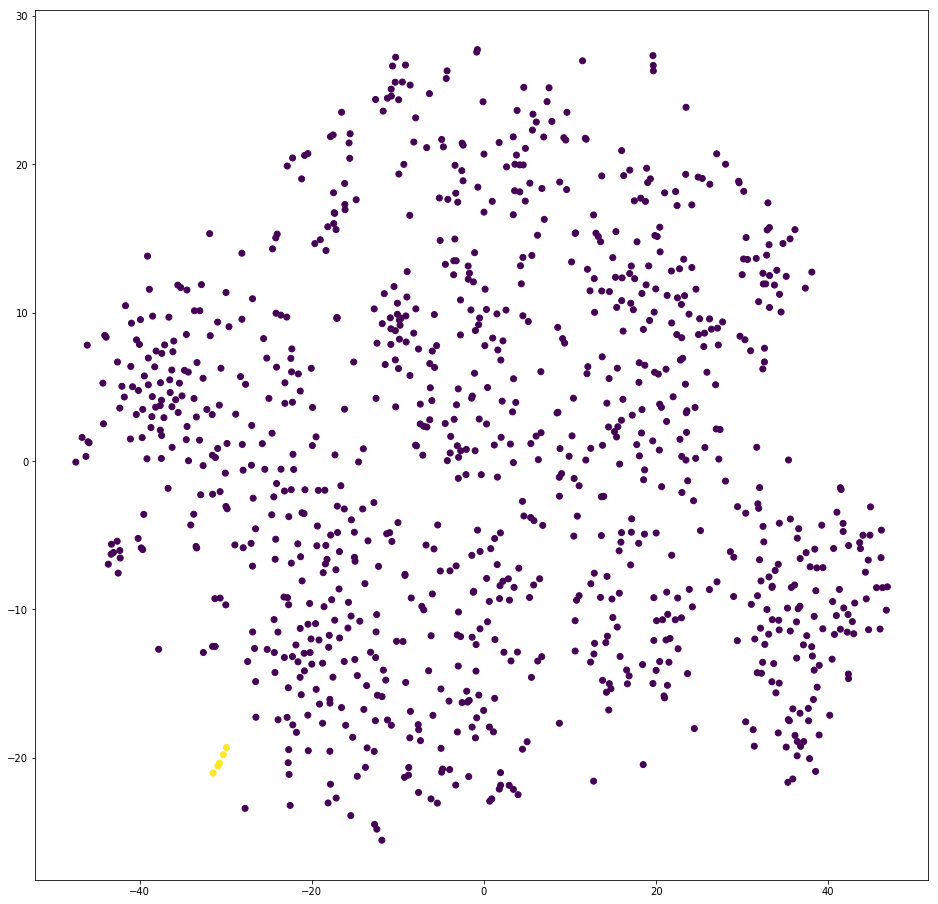

"word 'szkoda_majątkowy::noun' not in vocabulary"
"word 'uszczerbek_na_zdrowie::noun' not in vocabulary"
"word 'krzywda::noun' not in vocabulary"


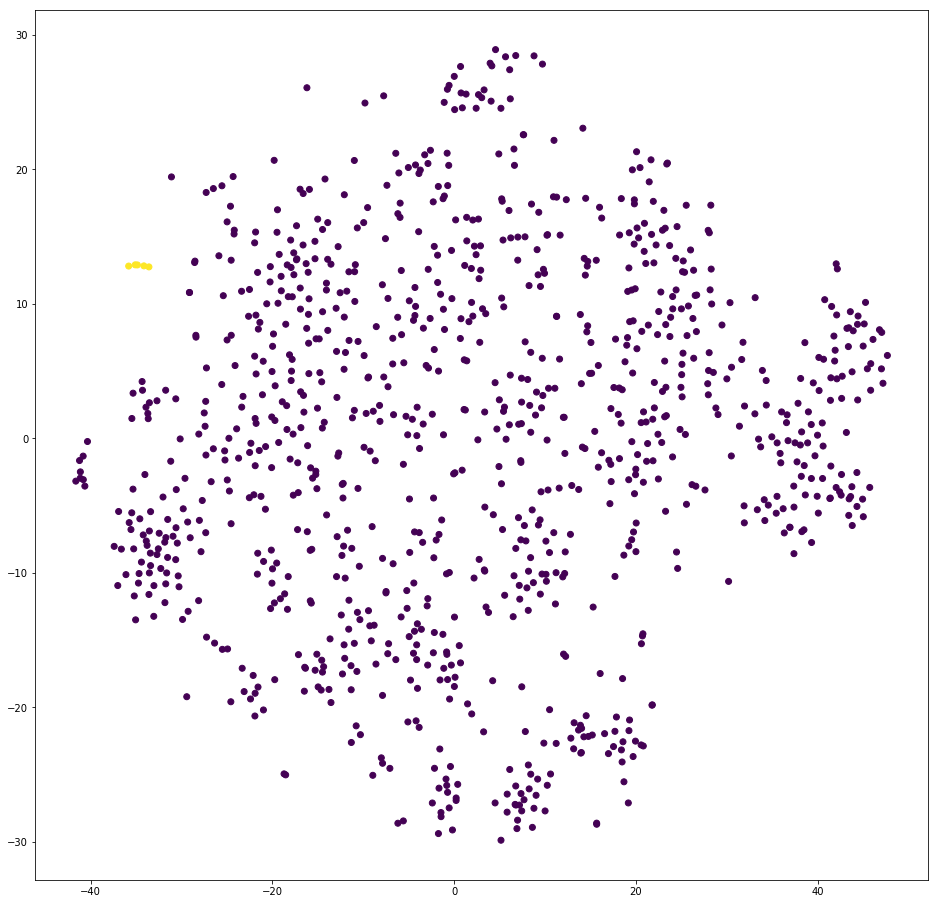

"word 'szkoda_majątkowy::noun' not in vocabulary"
"word 'uszczerbek_na_zdrowie::noun' not in vocabulary"
"word 'krzywda::noun' not in vocabulary"


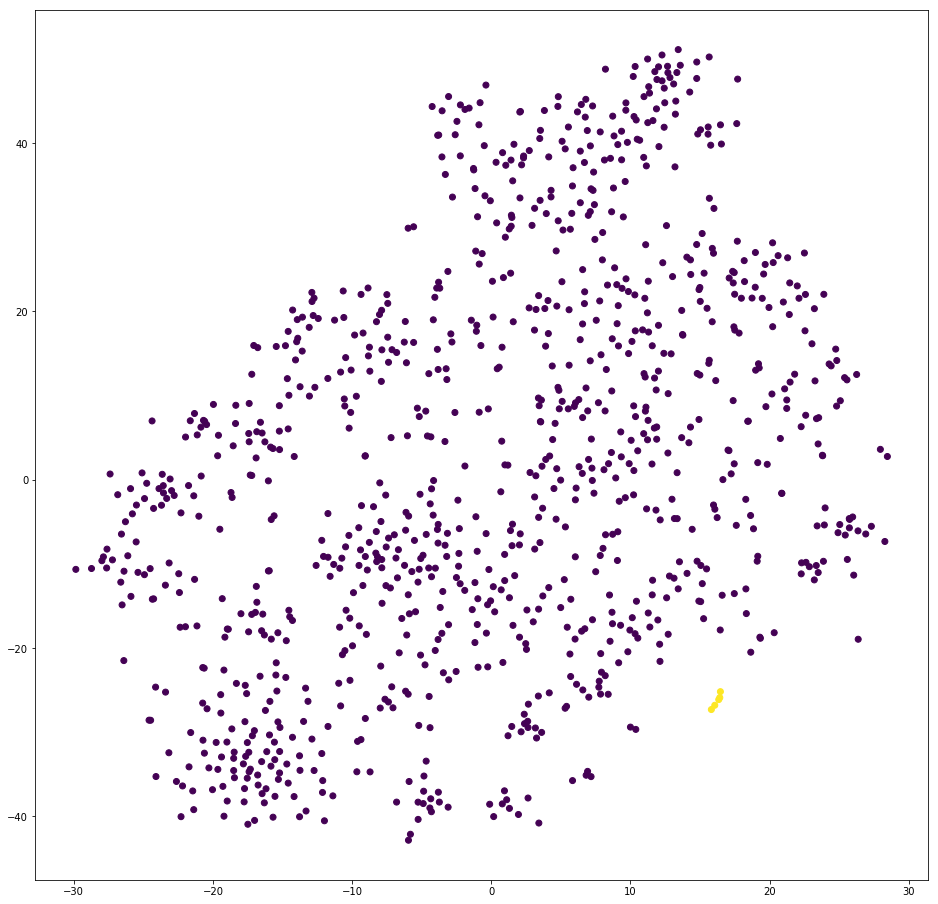

"word 'szkoda_majątkowy::noun' not in vocabulary"
"word 'uszczerbek_na_zdrowie::noun' not in vocabulary"
"word 'krzywda::noun' not in vocabulary"


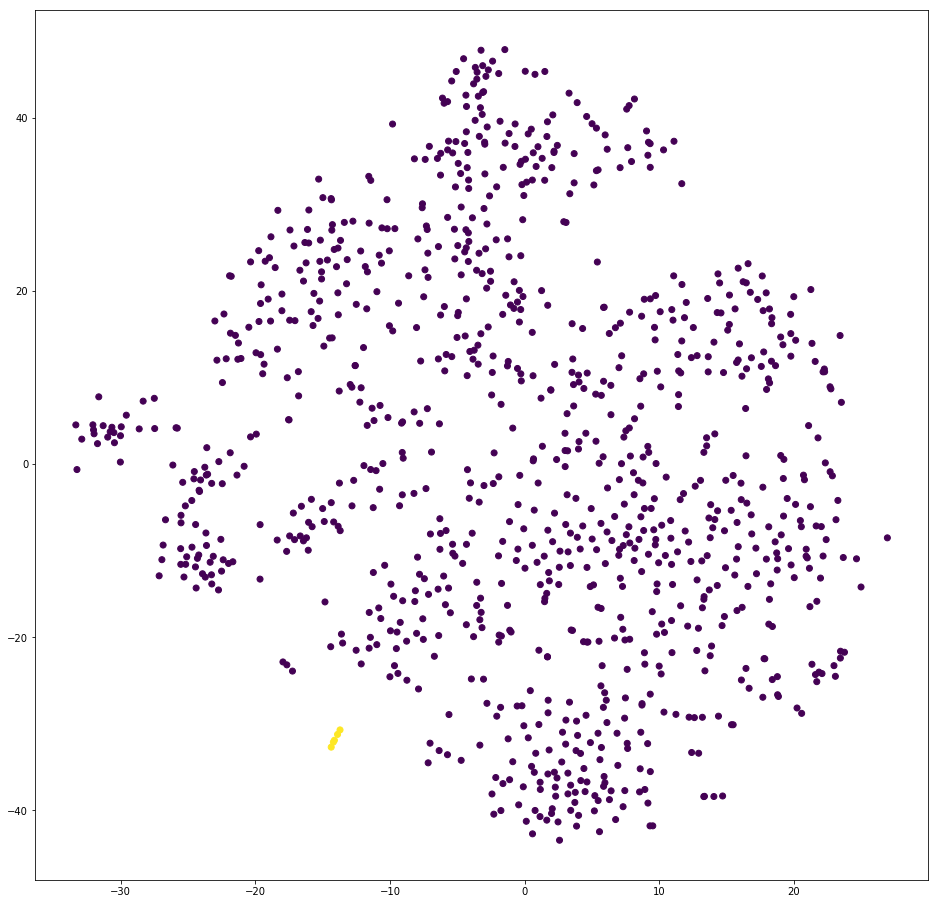

In [194]:
def generate_tsne_plot(words, k=1000):
    random_tokens = random.sample(list(model.vocab), k=k)
    random_embedings = safe_get_embedings(random_tokens)
    selected_tokens = list(map(get_token_from_noun,words))
    selected_embedings = safe_get_embedings(selected_tokens)
    embedings = np.array(random_embedings + selected_embedings)
    x = TSNE().fit_transform(embedings)
    c = np.concatenate([
        np.zeros(len(random_embedings)),
        np.ones(len(selected_embedings))
    ])
    plt.figure(figsize=(16, 16))
    plt.scatter(x[:,0], x[:,1], c=c)
    plt.show()
words = [
    "szkoda",
    "strata", 
    "uszczerbek",
    "szkoda majątkowy",
    "uszczerbek na zdrowie",
    "krzywda",
    "niesprawiedliwość",
    "nieszczęście",
]
generate_tsne_plot(words)
generate_tsne_plot(words)
generate_tsne_plot(words)
generate_tsne_plot(words)

## Hints

1. Read the classic articles:
   * [Distributed Representations of Words and Phrases and their Compositionality](http://papers.nips.cc/paper/5021-distributed-representations-of-words-andphrases)
   * [Efficient Estimation of Word Representations in Vector Space](https://arxiv.org/abs/1301.3781)
1. The word2vec algorithm uses two variants:
   1. CBOW - using the context words, the central word is predicted
   1. skip-gram - using the central word, the context words are predicted
1. The word2vec algorithm is pretty efficient. It can process a corpus containing 1 billion words in one day.
1. The vectors provided by the algorithm reflect some of the semantic and syntactic features of the represented
   words. E.e. the following equation should work in the vector space:
   `w2v("król") - w2v("mężczyzna") + w2v("kobieta") = w2v("królowa")`